In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [9]:
cleveland_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"))
colnames(cleveland_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
hungarian_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"))
colnames(hungarian_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
switzerland_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"))
colnames(switzerland_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
va_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"))
colnames(va_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland_data
hungarian_data
switzerland_data
va_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `2` -> `2...3`
• `0` -> `0...6`
• `2` -> `2...7`
• `0` -> `0...9`
• `0` -> `0...10`
• `?` -> `?...11`
• `?` -> `?...12`
• `?` -> `?...13`
• `0` -> `0...14`
Rows: 293 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): 130, 132, 0...6, 2...7, 185, 0...9, ?...11, ?...12, ?...13
dbl (5): 28, 1, 2...3, 0...10, 0...14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
36,1,4,110,0,?,0,125,1,1,2,?,6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
73,0,3,160,0,0,1,121,0,0,1,?,3,1
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
44,1,4,130,209,0,1,127,0,0,?,?,?,0
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2
58,1,4,?,385,1,2,?,?,?,?,?,?,0
62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [3]:
cleveland_data <- mutate(cleveland_data, region = "Cleveland")
hungarian_data <- mutate(hungarian_data, region = "Hungary")
switzerland_data <- mutate(switzerland_data, region = "Switzerland")
va_data <- mutate(va_data, region = "VA Long Beach")
cleveland_data
hungarian_data
switzerland_data
va_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0,Cleveland


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
29,1,2,120,243,0,0,160,0,0,?,?,?,0,Hungary
29,1,2,140,?,0,0,170,0,0,?,?,?,0,Hungary
30,0,1,170,237,0,1,170,0,0,?,?,6,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,?,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,?,?,1,Hungary


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
34,1,4,115,0,?,?,154,0,.2,1,?,?,1,Switzerland
35,1,4,?,0,?,0,130,1,?,?,?,7,3,Switzerland
36,1,4,110,0,?,0,125,1,1,2,?,6,1,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0,Switzerland
73,0,3,160,0,0,1,121,0,0,1,?,3,1,Switzerland
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1,Switzerland


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
44,1,4,130,209,0,1,127,0,0,?,?,?,0,VA Long Beach
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2,VA Long Beach
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1,VA Long Beach
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2,VA Long Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,0,VA Long Beach
62,1,2,120,254,0,2,93,1,0,?,?,?,1,VA Long Beach


In [4]:
final_df <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
final_df

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2,VA Long Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,0,VA Long Beach
62,1,2,120,254,0,2,93,1,0,?,?,?,1,VA Long Beach


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 30 rows containing missing values (`geom_point()`).”


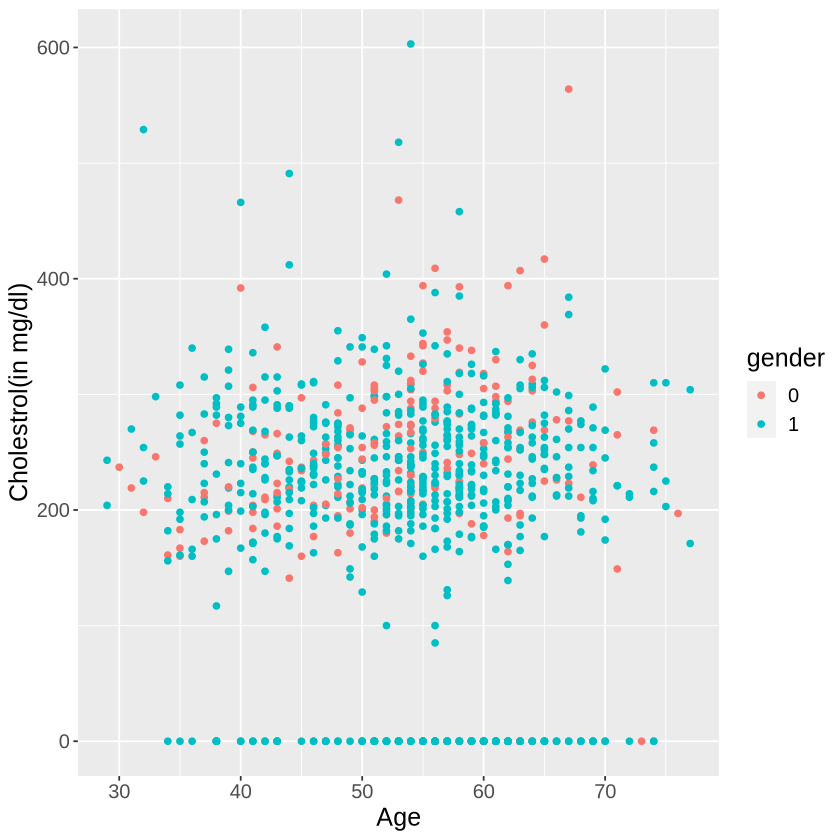

In [5]:
plot <- ggplot(final_df, aes(x = age, y = as.numeric(chol), colour = as_factor(sex))) +
        geom_point() +
        labs(x = "Age", y = "Cholestrol(in mg/dl)", colour = "gender") +
        theme(text = element_text(size = 15)) 

plot